In [1]:
import sys, os, datetime
sys.path.append("../../../")

from utils.contract_utils import init_contract
from utils.network_utils import configure_network_and_connect

import brownie

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
configure_network_and_connect(
    node_provider_https=f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}",
    network_name='mainnet'
)

In [6]:
pnl_contract = init_contract("0xF67A426e110c74c566174a37C9269780fB48096d")
genesis_block = 12836674
pnl_contract

<PnL Contract '0xF67A426e110c74c566174a37C9269780fB48096d'>

In [8]:
current_block = brownie.web3.eth.get_block_number()
current_block

14206711

In [9]:
blocks = list(range(genesis_block, current_block, 10000))
len(blocks)

138

In [10]:
gro_c_ratios = []
blocks_left = len(blocks)
for block in blocks:

    print(block, blocks_left)
    blocks_left -= 1

    block_details = brownie.web3.eth.get_block(block_identifier=block)
    block_time = datetime.datetime.fromtimestamp(block_details['timestamp'])

    assets_in_gvt = pnl_contract.lastGvtAssets(block_identifier=block) * 1e-18
    assets_in_pwrd = pnl_contract.lastPwrdAssets(block_identifier=block) * 1e-18
    c_ratio = assets_in_gvt / assets_in_pwrd

    gro_c_ratios.append(
        {
            'block': block,
            'timestamp': block_time,
            'assets_in_gvt': assets_in_gvt,
            'assets_in_pwrd': assets_in_pwrd,
            'c_ratio': c_ratio
        }
    )

df_c_ratio = pd.DataFrame(gro_c_ratios)
df_c_ratio

12836674 138
12846674 137
12856674 136
12866674 135
12876674 134
12886674 133
12896674 132
12906674 131
12916674 130
12926674 129
12936674 128
12946674 127
12956674 126
12966674 125
12976674 124
12986674 123
12996674 122
13006674 121
13016674 120
13026674 119
13036674 118
13046674 117
13056674 116
13066674 115
13076674 114
13086674 113
13096674 112
13106674 111
13116674 110
13126674 109
13136674 108
13146674 107
13156674 106
13166674 105
13176674 104
13186674 103
13196674 102
13206674 101
13216674 100
13226674 99
13236674 98
13246674 97
13256674 96
13266674 95
13276674 94
13286674 93
13296674 92
13306674 91
13316674 90
13326674 89
13336674 88
13346674 87
13356674 86
13366674 85
13376674 84
13386674 83
13396674 82
13406674 81
13416674 80
13426674 79
13436674 78
13446674 77
13456674 76
13466674 75
13476674 74
13486674 73
13496674 72
13506674 71
13516674 70
13526674 69
13536674 68
13546674 67
13556674 66
13566674 65
13576674 64
13586674 63
13596674 62
13606674 61
13616674 60
13626674 59
1

,block,timestamp,assets_in_gvt,assets_in_pwrd,c_ratio
0,12836674,2021-07-16 09:51:44,1.976643e+06,6.338153e+05,3.118642
1,12846674,2021-07-17 23:35:14,2.197028e+06,6.920006e+05,3.174893
2,12856674,2021-07-19 13:15:04,2.269098e+06,6.966043e+05,3.257370
3,12866674,2021-07-21 02:44:34,3.017574e+06,1.206326e+06,2.501458
4,12876674,2021-07-22 16:12:39,3.017263e+06,1.240148e+06,2.432986
...,...,...,...,...,...
133,14166674,2022-02-08 18:07:01,2.383392e+07,1.593965e+07,1.495259
134,14176674,2022-02-10 07:17:24,2.383386e+07,1.594060e+07,1.495167
135,14186674,2022-02-11 20:33:03,2.358124e+07,1.594161e+07,1.479226
136,14196674,2022-02-13 09:15:47,2.357128e+07,1.594130e+07,1.478630


In [11]:
df_c_ratio.set_index('timestamp', inplace=True)
df_c_ratio

,block,assets_in_gvt,assets_in_pwrd,c_ratio
timestamp,,,,
2021-07-16 09:51:44,12836674,1.976643e+06,6.338153e+05,3.118642
2021-07-17 23:35:14,12846674,2.197028e+06,6.920006e+05,3.174893
2021-07-19 13:15:04,12856674,2.269098e+06,6.966043e+05,3.257370
2021-07-21 02:44:34,12866674,3.017574e+06,1.206326e+06,2.501458
2021-07-22 16:12:39,12876674,3.017263e+06,1.240148e+06,2.432986
...,...,...,...,...
2022-02-08 18:07:01,14166674,2.383392e+07,1.593965e+07,1.495259
2022-02-10 07:17:24,14176674,2.383386e+07,1.594060e+07,1.495167
2022-02-11 20:33:03,14186674,2.358124e+07,1.594161e+07,1.479226


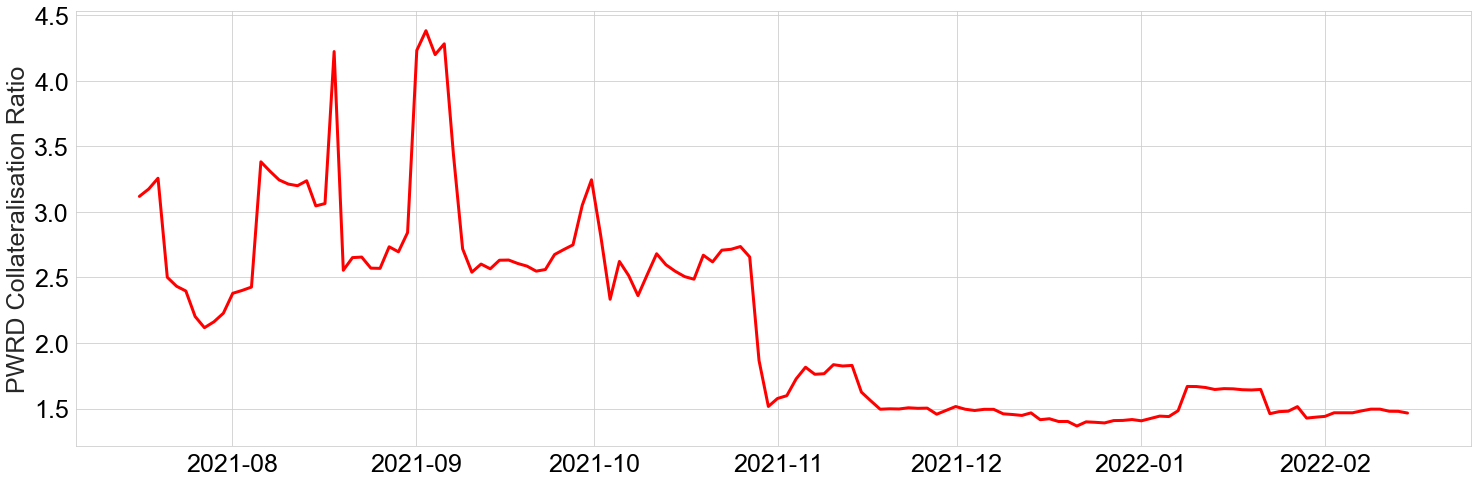

In [13]:
fig, ax = plt.subplots(1,1, figsize=(25, 8))

ax.plot(
    df_c_ratio.index,
    df_c_ratio.c_ratio,
    color='red',
    lw=3
)

ax.set_ylabel("PWRD Collateralisation Ratio", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False);

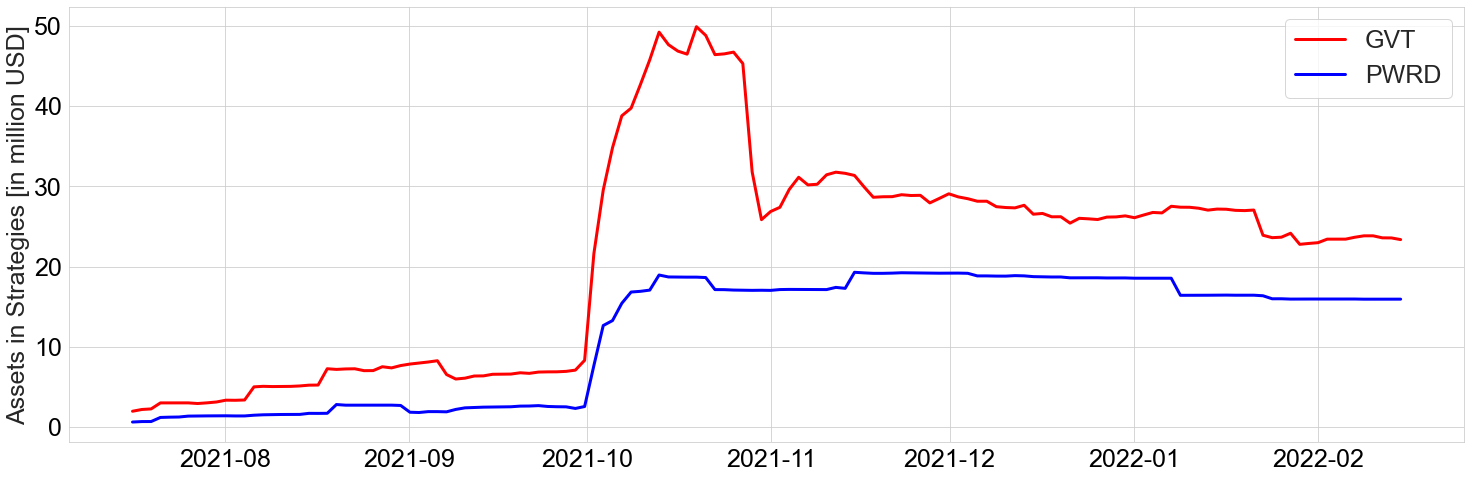

In [17]:
fig, ax = plt.subplots(1,1, figsize=(25, 8))

ax.plot(
    df_c_ratio.index,
    df_c_ratio.assets_in_gvt * 1e-6,
    color='red',
    label='GVT',
    lw=3
)

ax.plot(
    df_c_ratio.index,
    df_c_ratio.assets_in_pwrd * 1e-6,
    color='blue',
    label='PWRD',
    lw=3
)

ax.set_ylabel("Assets in Strategies [in million USD]", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);